In [3]:
from innov.tree_gen import *

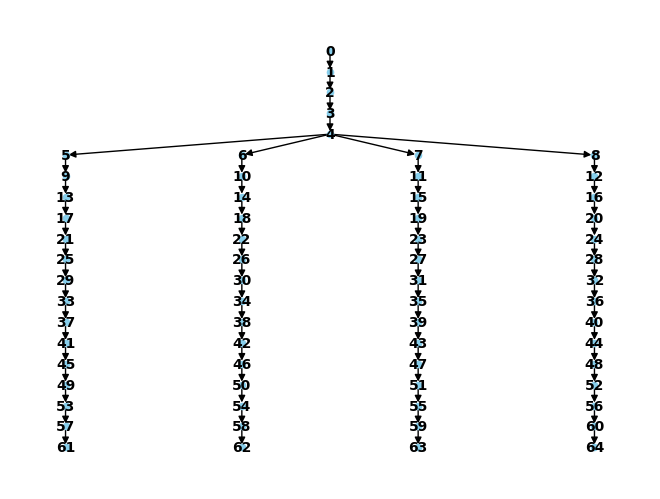

In [18]:
tree = BiTree(5, 15, 4, 0)
pos = draw_directed_tree(tree.as_graph(), 0)

tree = JaxBiTree(5, 15, .1)
pos = draw_directed_tree(tree.as_graph(), 0)

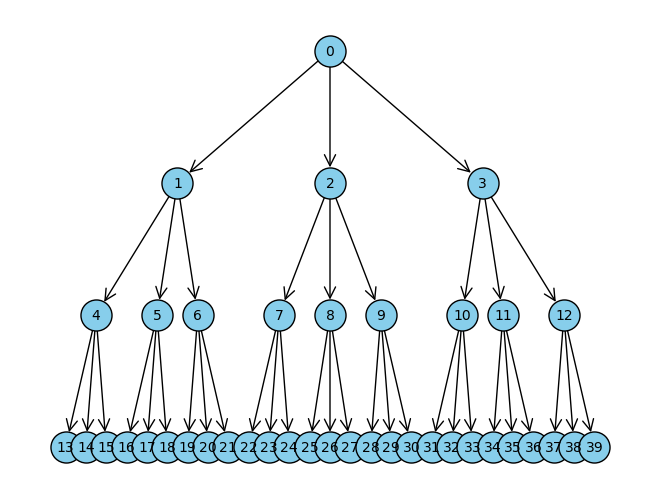

In [37]:
def tree_graph(r, n):
    # Create a full r-ary tree of height 3 and branching ratio 3
    G = nx.full_rary_tree(r, n)

    DG = nx.DiGraph()

    # Add nodes
    DG.add_nodes_from(G.nodes())

    # Manually add directed edges from parent to children
    for u, v in G.edges():
        if u<v:
            DG.add_edge(u, v)
        else:
            DG.add_edge(v, u)
    return DG

DG = tree_graph(3, 40)

# Draw the graph
nx.drawing.nx_agraph.graphviz_layout(DG, prog='dot')
nx.draw(DG, pos=pos,
        with_labels=True, node_color='skyblue', node_size=500,
        font_size=10, font_color='black', arrowsize=20, edgecolors='k', arrowstyle='->')

Hypothesis 1 (accounts for exp pop growth)  
$G = \tilde{G}_t / K^{X_i} = \tilde{G}_{t+1}/ K^{X_i+1}$

Hypothesis 2 (resource constrianed growth, but also exp growth b/c of $r$)  
$G_t = \tilde{G} / K^{X_i} > \tilde{G} / K^{X_i+1}$

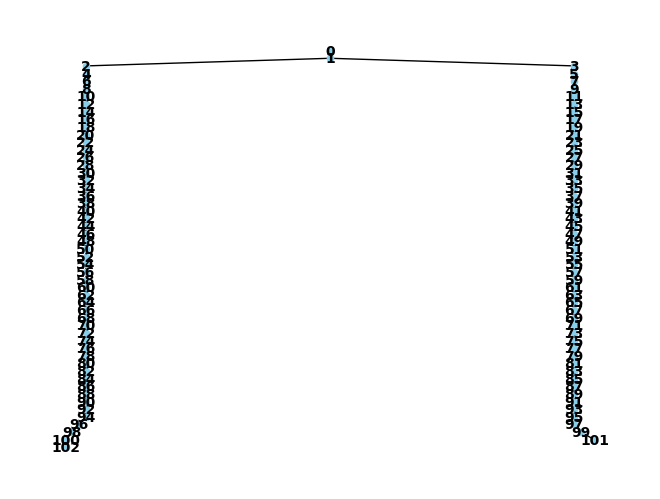

In [2]:
N = 10      # Number of nodes in the tree
k = 3       # Degree of each node (number of children per parent)
density = 0.5  # Density of edges between consecutive generations (0 to 1)
ramification = 2
deep_1 = 1
deep = ramification**deep_1 -1
#directed_tree = nx.balanced_tree(ramification, deep_1)
directed_tree = nx.Graph()
directed_tree.add_edges_from([[0,1], [1,2], [1,3]])
for i in range(deep, 2*deep+1):
    directed_tree.add_edges_from([[i+j*(deep+1), i+(j+1)*(deep+1)] for j in range(50)])
pos = draw_directed_tree(directed_tree, 0)
n = len(directed_tree)

In [3]:
"""Compute the Ajacency mactrix"""
for t in range(20):
    for γ in np.arange(0.1, 1.0, 0.1):
        
        example_adj = nx.adjacency_matrix(directed_tree).toarray()
        n_ = example_adj.shape[0]
        shells = graph_as_shells([0], example_adj)  # compute shells
        example_adj[np.tril_indices_from(example_adj, k=-1)] = 0 
        H = nx.DiGraph(example_adj)

        links = 0
        posible_links =[]
        for i in range(len(shells)-1):                          #  Compute possible edges
            links += len(shells[i])*len(shells[i+1])
            pairs = get_pair_combinations(shells[i], shells[i+1]) 
            posible_links+= pairs
        links -= n

        for i in H.edges():                                     # Remove existing links 
            posible_links.pop(posible_links.index(i))

        H_1 = add_random_edge_between_generations(H, posible_links, links, γ)    # add a fraction of links = γ
        #H_1.add_edge(202, 3)
        #H_1.add_edge(402, 2)
        pos = draw_directed_tree(H_1, 0)
        if γ==0.0:
            with open("pos.p", 'wb') as f:
                pickle.dump(pos, f)
        new_adj = nx.adjacency_matrix(H_1).toarray()                             # get adjacency matrix
        #new_adj[np.tril_indices_from(example_adj, k=-1)] = 0                     # remove lower off diagonal terms
        with open("cache/tree_gamma_"+str(format(γ, '.1f'))+"_ramification_2_deep_50_branches_2_sample_"+str(t)+".p", 'wb') as f:
            pickle.dump(new_adj, f)

NameError: name 'n' is not defined

In [90]:

with open("tree_gamma_0_ramification_2_deep_50_branches_2.p", 'wb') as f:
    pkl.dump(new_adj, f)
with open("pos.p", 'wb') as f:
    pkl.dump(pos, f)

In [118]:
posible_links

[(2, 4),
 (3, 53),
 (4, 54),
 (53, 5),
 (5, 55),
 (54, 6),
 (6, 56),
 (55, 7),
 (7, 57),
 (56, 8),
 (8, 58),
 (57, 9),
 (9, 59),
 (58, 10),
 (10, 60),
 (59, 11),
 (11, 61),
 (60, 12),
 (12, 62),
 (61, 13),
 (13, 63),
 (62, 14),
 (14, 64),
 (63, 15),
 (64, 16),
 (15, 65),
 (16, 66),
 (65, 17),
 (17, 67),
 (66, 18),
 (18, 68),
 (67, 19),
 (19, 69),
 (68, 20),
 (20, 70),
 (69, 21),
 (21, 71),
 (70, 22),
 (22, 72),
 (71, 23),
 (23, 73),
 (72, 24),
 (24, 74),
 (73, 25),
 (25, 75),
 (74, 26),
 (26, 76),
 (75, 27),
 (27, 77),
 (76, 28),
 (28, 78),
 (77, 29),
 (29, 79),
 (78, 30),
 (30, 80),
 (79, 31),
 (80, 32),
 (31, 81),
 (32, 82),
 (81, 33),
 (33, 83),
 (82, 34),
 (34, 84),
 (83, 35),
 (35, 85),
 (84, 36),
 (36, 86),
 (85, 37),
 (37, 87),
 (86, 38),
 (38, 88),
 (87, 39),
 (39, 89),
 (88, 40),
 (40, 90),
 (89, 41),
 (41, 91),
 (90, 42),
 (42, 92),
 (91, 43),
 (43, 93),
 (92, 44),
 (44, 94),
 (93, 45),
 (45, 95),
 (94, 46),
 (46, 96),
 (95, 47),
 (96, 48),
 (47, 97),
 (48, 98),
 (97, 49),
 (

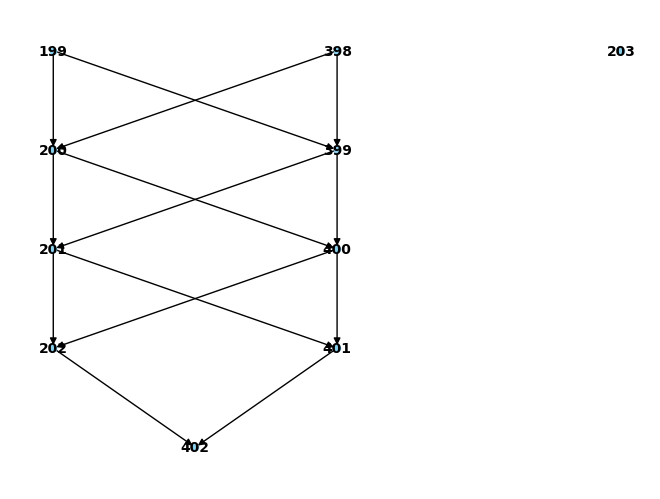

In [21]:
pos = draw_directed_tree(H_1.subgraph([203, 202,201, 200, 199,398,  399, 402, 401, 400, 404]), 0)

In [151]:
H = nx.DiGraph(new_adj)

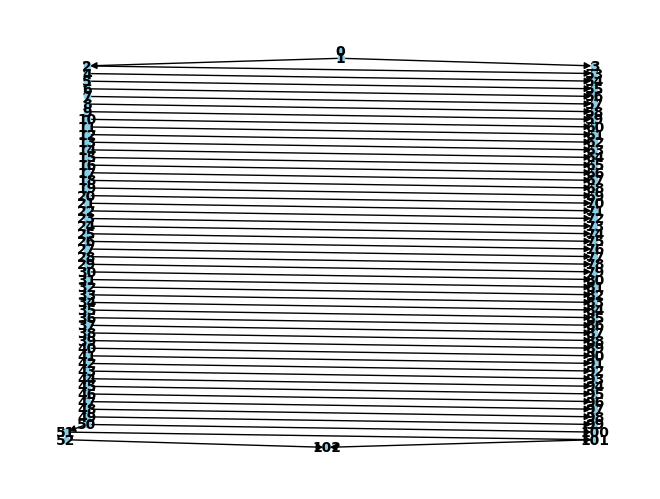

In [152]:
pos = draw_directed_tree(H, 0)

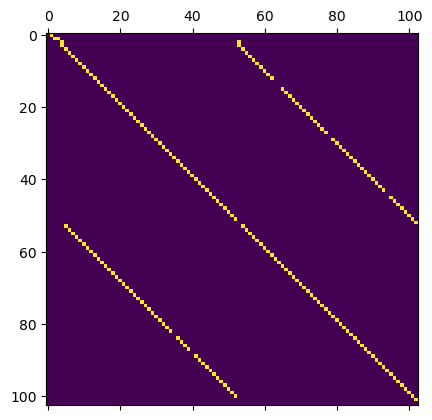

In [124]:
plt.matshow(new_adj)
#plt.axis(xmin = 30, xmax= 40, ymin = 40, ymax= 30)
#plt.axis()

98

In [50]:

len(posible_links), (16, 32) in posible_links

(99, False)

In [98]:
1/98

0.01020408163265306

In [153]:
import pickle as pkl
with open("tree_gamma_5_ramification_2_deep_50_branches_2_unbalanced.p", 'wb') as f:
    pkl.dump(new_adj, f)
with open("pos.p", 'wb') as f:
    pkl.dump(pos, f)
#Ady = jnp.array(Ady, dtype=bool_)
#save_pickle(['example_adj'], 'small_world_k4.p', True)

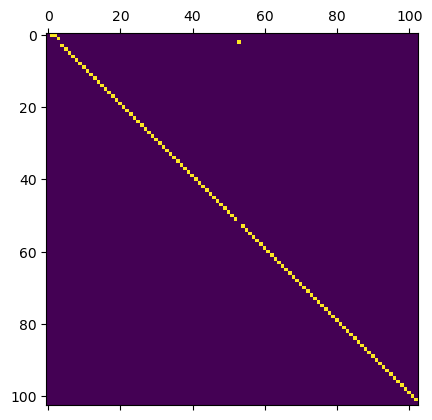

In [345]:
plt.matshow(new_adj)

In [254]:
new_adj = nx.adjacency_matrix(H_1).toarray()

In [108]:
    links = 0
    posible_links =[]
    for i in range(len(shells)-1):                          #  Compute possible edges
        links += len(shells[i])*len(shells[i+1])
        pairs = get_pair_combinations(shells[i], shells[i+1]) 
        posible_links+= pairs

In [115]:
links-n+1

99

In [117]:
posible_links

[(2, 4),
 (3, 53),
 (4, 54),
 (53, 5),
 (5, 55),
 (54, 6),
 (6, 56),
 (55, 7),
 (7, 57),
 (56, 8),
 (8, 58),
 (57, 9),
 (9, 59),
 (58, 10),
 (10, 60),
 (59, 11),
 (11, 61),
 (60, 12),
 (12, 62),
 (61, 13),
 (13, 63),
 (62, 14),
 (14, 64),
 (63, 15),
 (64, 16),
 (15, 65),
 (16, 66),
 (65, 17),
 (17, 67),
 (66, 18),
 (18, 68),
 (67, 19),
 (19, 69),
 (68, 20),
 (20, 70),
 (69, 21),
 (21, 71),
 (70, 22),
 (22, 72),
 (71, 23),
 (23, 73),
 (72, 24),
 (24, 74),
 (73, 25),
 (25, 75),
 (74, 26),
 (26, 76),
 (75, 27),
 (27, 77),
 (76, 28),
 (28, 78),
 (77, 29),
 (29, 79),
 (78, 30),
 (30, 80),
 (79, 31),
 (80, 32),
 (31, 81),
 (32, 82),
 (81, 33),
 (33, 83),
 (82, 34),
 (34, 84),
 (83, 35),
 (35, 85),
 (84, 36),
 (36, 86),
 (85, 37),
 (37, 87),
 (86, 38),
 (38, 88),
 (87, 39),
 (39, 89),
 (88, 40),
 (40, 90),
 (89, 41),
 (41, 91),
 (90, 42),
 (42, 92),
 (91, 43),
 (43, 93),
 (92, 44),
 (44, 94),
 (93, 45),
 (45, 95),
 (94, 46),
 (46, 96),
 (95, 47),
 (96, 48),
 (47, 97),
 (48, 98),
 (97, 49),
 (

In [111]:
for i in H.edges():                                     # Remove exixting links 
        posible_links.pop(posible_links.index(i))

In [106]:
shells = graph_as_shells([0], example_adj)  # compute shells

H = nx.Graph(example_adj)

1
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102


In [114]:
n

103

In [126]:
type(new_adj)

numpy.ndarray

In [133]:
    γ= 0.
    example_adj = nx.adjacency_matrix(directed_tree).toarray()
    n_ = example_adj.shape[0]

    shells = graph_as_shells([0], example_adj)  # compute shells
    example_adj[np.tril_indices_from(example_adj, k=-1)] = 0 
    H = nx.DiGraph(example_adj)

    links = 0
    posible_links =[]
    for i in range(len(shells)-1):                          #  Compute possible edges
        links += len(shells[i])*len(shells[i+1])
        pairs = get_pair_combinations(shells[i], shells[i+1]) 
        posible_links+= pairs
    links -= n

    for i in H.edges():                                     # Remove exixting links 
        posible_links.pop(posible_links.index(i))

    H_1 = add_random_edge_between_generations(H, posible_links, links, γ)    # add a fraction of links = γ

    new_adj = nx.adjacency_matrix(H_1).toarray()                             # get adjacency matrix
    #new_adj[np.tril_indices_from(example_adj, k=-1)] = 0                     # remove lower off diagonal terms
    with open("tree_gamma_"+str(γ)+"_ramification_2_deep_50_branches_2.p", 'wb') as f:
        pkl.dump(new_adj, f)

1
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102


In [136]:
    γ=0.0
    example_adj = nx.adjacency_matrix(directed_tree).toarray()
    n_ = example_adj.shape[0]

    shells = graph_as_shells([0], example_adj)  # compute shells
    example_adj[np.tril_indices_from(example_adj, k=-1)] = 0 
    H = nx.DiGraph(example_adj)

    links = 0
    posible_links =[]
    for i in range(len(shells)-1):                          #  Compute possible edges
        links += len(shells[i])*len(shells[i+1])
        pairs = get_pair_combinations(shells[i], shells[i+1]) 
        posible_links+= pairs
    links -= n

    for i in H.edges():                                     # Remove exixting links 
        posible_links.pop(posible_links.index(i))

    H_1 = add_random_edge_between_generations(H, posible_links, links, γ)    # add a fraction of links = γ

    new_adj = nx.adjacency_matrix(H_1).toarray()                             # get adjacency matrix
    #new_adj[np.tril_indices_from(example_adj, k=-1)] = 0                     # remove lower off diagonal terms
    with open("tree_gamma_"+str(γ)+"_ramification_2_deep_50_branches_2.p", 'wb') as f:
        pkl.dump(new_adj, f)

1
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102


In [149]:
    example_adj = nx.adjacency_matrix(directed_tree).toarray()
    n_ = example_adj.shape[0]

    shells = graph_as_shells([0], example_adj)  # compute shells
    example_adj[np.tril_indices_from(example_adj, k=-1)] = 0 
    H = nx.DiGraph(example_adj)

    links = 0
    posible_links =[]
    for i in range(len(shells)-1):                          #  Compute possible edges
        links += len(shells[i])*len(shells[i+1])
        pairs = get_pair_combinations(shells[i], shells[i+1]) 
        posible_links+= pairs
    links -= n

    for i in H.edges():                                     # Remove exixting links 
        posible_links.pop(posible_links.index(i))
        
    for i,j in posible_links:
        if i<j:
            H.add_edge(i, j)
    H.remove_edge(3, 4)

1
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102


In [150]:
    new_adj = nx.adjacency_matrix(H).toarray()                             # get adjacency matrix
    #new_adj[np.tril_indices_from(example_adj, k=-1)] = 0                     # remove lower off diagonal terms

In [22]:
directed_tree.nodes()

NodeView((0, 1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 361, 363, 365, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 391, 393, 395, 397, 399, 401, 4, 6, 8, 10, 12, 14, 16, 18, 20, 2